In [220]:
!pip install kagglehub
import kagglehub

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Defaulting to user installation because normal site-packages is not writeable


In [221]:
orginal_df = pd.read_csv('titanic.csv')
orginal_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [222]:
#Embarked	از کدوم بندر سوار شدن
#Fare هزینه ای که برای بلیط پرداخت کردن
df = orginal_df[["Sex","Age","Survived","Cabin","SibSp","Parch","Embarked","Pclass","Fare"]]
df

,Sex,Age,Survived,Cabin,SibSp,Parch,Embarked,Pclass,Fare
0,male,22.0,0,NaN,1,0,S,3,7.2500
1,female,38.0,1,C85,1,0,C,1,71.2833
2,female,26.0,1,NaN,0,0,S,3,7.9250
3,female,35.0,1,C123,1,0,S,1,53.1000
4,male,35.0,0,NaN,0,0,S,3,8.0500
...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,NaN,0,0,S,2,13.0000
887,female,19.0,1,B42,0,0,S,1,30.0000
888,female,NaN,0,NaN,1,2,S,3,23.4500
889,male,26.0,1,C148,0,0,C,1,30.0000


In [223]:
df.loc[:, "Sex"] = df["Sex"].replace({"male": 1, "female": 0})
df

C:\Users\ASUSCenter\AppData\Local\Temp\ipykernel_12576\2810343388.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[:, "Sex"] = df["Sex"].replace({"male": 1, "female": 0})


,Sex,Age,Survived,Cabin,SibSp,Parch,Embarked,Pclass,Fare
0,1,22.0,0,NaN,1,0,S,3,7.2500
1,0,38.0,1,C85,1,0,C,1,71.2833
2,0,26.0,1,NaN,0,0,S,3,7.9250
3,0,35.0,1,C123,1,0,S,1,53.1000
4,1,35.0,0,NaN,0,0,S,3,8.0500
...,...,...,...,...,...,...,...,...,...
886,1,27.0,0,NaN,0,0,S,2,13.0000
887,0,19.0,1,B42,0,0,S,1,30.0000
888,0,NaN,0,NaN,1,2,S,3,23.4500
889,1,26.0,1,C148,0,0,C,1,30.0000


In [224]:
from sklearn.impute import SimpleImputer,KNNImputer
cabin = pd.DataFrame(df["Cabin"].notna().astype(int))
impute = SimpleImputer(strategy="constant",fill_value=0)
new_cabin_column = impute.fit_transform(cabin)
df["Cabin"] = new_cabin_column
df

C:\Users\ASUSCenter\AppData\Local\Temp\ipykernel_12576\2632288713.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Cabin"] = new_cabin_column


,Sex,Age,Survived,Cabin,SibSp,Parch,Embarked,Pclass,Fare
0,1,22.0,0,0,1,0,S,3,7.2500
1,0,38.0,1,1,1,0,C,1,71.2833
2,0,26.0,1,0,0,0,S,3,7.9250
3,0,35.0,1,1,1,0,S,1,53.1000
4,1,35.0,0,0,0,0,S,3,8.0500
...,...,...,...,...,...,...,...,...,...
886,1,27.0,0,0,0,0,S,2,13.0000
887,0,19.0,1,1,0,0,S,1,30.0000
888,0,NaN,0,0,1,2,S,3,23.4500
889,1,26.0,1,1,0,0,C,1,30.0000


In [225]:
from sklearn.impute import SimpleImputer

imputer_age = SimpleImputer(strategy="median")  # یا mean، بسته به انتخاب شما
df.loc[:, "Age"] = imputer_age.fit_transform(df[["Age"]])

In [226]:
#one hot for Embarked

new_Embarked = pd.get_dummies(df["Embarked"], prefix="E")
new_Embarked = new_Embarked.astype(int)
df = df.drop("Embarked", axis=1)
df = pd.concat([df, new_Embarked], axis=1)
df

,Sex,Age,Survived,Cabin,SibSp,Parch,Pclass,Fare,E_C,E_Q,E_S
0,1,22.0,0,0,1,0,3,7.2500,0,0,1
1,0,38.0,1,1,1,0,1,71.2833,1,0,0
2,0,26.0,1,0,0,0,3,7.9250,0,0,1
3,0,35.0,1,1,1,0,1,53.1000,0,0,1
4,1,35.0,0,0,0,0,3,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,1,27.0,0,0,0,0,2,13.0000,0,0,1
887,0,19.0,1,1,0,0,1,30.0000,0,0,1
888,0,28.0,0,0,1,2,3,23.4500,0,0,1
889,1,26.0,1,1,0,0,1,30.0000,1,0,0


In [227]:
#one hot for Pclass
new_Pclass = pd.get_dummies(df["Pclass"], prefix="Pc")
new_Pclass = new_Pclass.astype(int)
df = df.drop("Pclass", axis=1)
df = pd.concat([df, new_Pclass], axis=1)
df

,Sex,Age,Survived,Cabin,SibSp,Parch,Fare,E_C,E_Q,E_S,Pc_1,Pc_2,Pc_3
0,1,22.0,0,0,1,0,7.2500,0,0,1,0,0,1
1,0,38.0,1,1,1,0,71.2833,1,0,0,1,0,0
2,0,26.0,1,0,0,0,7.9250,0,0,1,0,0,1
3,0,35.0,1,1,1,0,53.1000,0,0,1,1,0,0
4,1,35.0,0,0,0,0,8.0500,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,27.0,0,0,0,0,13.0000,0,0,1,0,1,0
887,0,19.0,1,1,0,0,30.0000,0,0,1,1,0,0
888,0,28.0,0,0,1,2,23.4500,0,0,1,0,0,1
889,1,26.0,1,1,0,0,30.0000,1,0,0,1,0,0


In [228]:
df["Family_size"] = df["SibSp"] + df["Parch"]
df = df.drop(["SibSp", "Parch"], axis=1)
df

,Sex,Age,Survived,Cabin,Fare,E_C,E_Q,E_S,Pc_1,Pc_2,Pc_3,Family_size
0,1,22.0,0,0,7.2500,0,0,1,0,0,1,1
1,0,38.0,1,1,71.2833,1,0,0,1,0,0,1
2,0,26.0,1,0,7.9250,0,0,1,0,0,1,0
3,0,35.0,1,1,53.1000,0,0,1,1,0,0,1
4,1,35.0,0,0,8.0500,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,27.0,0,0,13.0000,0,0,1,0,1,0,0
887,0,19.0,1,1,30.0000,0,0,1,1,0,0,0
888,0,28.0,0,0,23.4500,0,0,1,0,0,1,3
889,1,26.0,1,1,30.0000,1,0,0,1,0,0,0


In [229]:
# finding best eps and min_simples for outlier points

from sklearn.cluster import DBSCAN

age_data = df[['Age']]

eps_values = np.arange(0.1, 1, 0.1)
min_samples_values = np.arange(2, 10, 1)
best_num_noise = float('inf')
best_eps = None
best_min_samples = None

for eps in eps_values:
    for min_samples in min_samples_values:
        cluster_db = DBSCAN(eps=eps, min_samples=min_samples)
        pred_y = cluster_db.fit_predict(age_data)
        # تعداد خوشه ها (برچسب -1 نویز است، حساب نمیشه)
        num_clusters = len(set(pred_y)) - (1 if -1 in pred_y else 0)
        # تعداد نویزها
        num_noise = list(pred_y).count(-1)
        print(f"eps={eps:.2f}, min_samples={min_samples}: noise={num_noise}")

        # اگر نویز کمتر شد، این حالت را بهترین انتخاب کن
        if num_noise < best_num_noise:
            best_num_noise = num_noise
            best_pred_y = pred_y
            best_eps = eps
            best_min_samples = min_samples

print(f"\nBest parameters: eps={best_eps:.2f}, min_samples={best_min_samples}")
print(f"Number of noise points: {best_num_noise}")

eps=0.10, min_samples=2: noise=14
eps=0.10, min_samples=3: noise=42
eps=0.10, min_samples=4: noise=57
eps=0.10, min_samples=5: noise=81
eps=0.10, min_samples=6: noise=99
eps=0.10, min_samples=7: noise=135
eps=0.10, min_samples=8: noise=142
eps=0.10, min_samples=9: noise=158
eps=0.20, min_samples=2: noise=14
eps=0.20, min_samples=3: noise=42
eps=0.20, min_samples=4: noise=57
eps=0.20, min_samples=5: noise=81
eps=0.20, min_samples=6: noise=96
eps=0.20, min_samples=7: noise=132
eps=0.20, min_samples=8: noise=139
eps=0.20, min_samples=9: noise=155
eps=0.30, min_samples=2: noise=13
eps=0.30, min_samples=3: noise=41
eps=0.30, min_samples=4: noise=56
eps=0.30, min_samples=5: noise=80
eps=0.30, min_samples=6: noise=95
eps=0.30, min_samples=7: noise=131
eps=0.30, min_samples=8: noise=139
eps=0.30, min_samples=9: noise=155
eps=0.40, min_samples=2: noise=13
eps=0.40, min_samples=3: noise=41
eps=0.40, min_samples=4: noise=56
eps=0.40, min_samples=5: noise=80
eps=0.40, min_samples=6: noise=95
eps=0

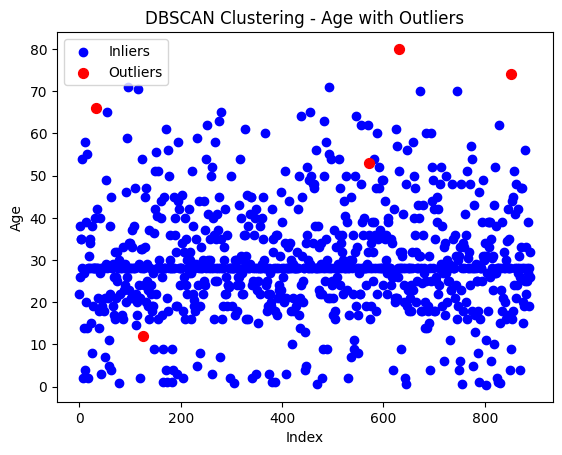

outliers:  5


In [230]:
#show outliers in plot

outliers = age_data[best_pred_y == -1]
core_points = age_data[best_pred_y != -1]
# show clusters
plt.scatter(core_points.index, core_points['Age'], c='blue', label='Inliers')
plt.scatter(outliers.index, outliers['Age'], c='red', label='Outliers', s=50)
plt.xlabel('Index')
plt.ylabel('Age')
plt.legend()
plt.title('DBSCAN Clustering - Age with Outliers')
plt.show()
num_outliers = np.sum(best_pred_y == -1)

print("outliers: ",num_outliers)


تعداد نقاط حذف شده: 5
سایز دیتافریم قبل: 891, بعد: 886


,Sex,Age,Survived,Cabin,Fare,E_C,E_Q,E_S,Pc_1,Pc_2,Pc_3,Family_size
0,1,22.0,0,0,7.2500,0,0,1,0,0,1,1
1,0,38.0,1,1,71.2833,1,0,0,1,0,0,1
2,0,26.0,1,0,7.9250,0,0,1,0,0,1,0
3,0,35.0,1,1,53.1000,0,0,1,1,0,0,1
4,1,35.0,0,0,8.0500,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
881,1,27.0,0,0,13.0000,0,0,1,0,1,0,0
882,0,19.0,1,1,30.0000,0,0,1,1,0,0,0
883,0,28.0,0,0,23.4500,0,0,1,0,0,1,3
884,1,26.0,1,1,30.0000,1,0,0,1,0,0,0


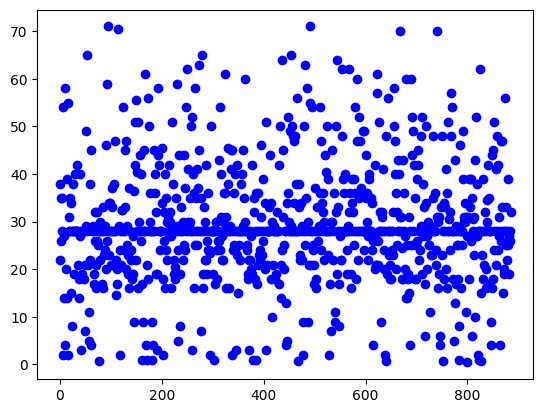

In [231]:
#remove noise from Age Clusters

outlier_indices = np.where(best_pred_y == -1)[0]

# حذف آن‌ها از دیتافریم اصلی df (که ستون Age را دارد)
df_cleaned = df.drop(index=outlier_indices).reset_index(drop=True)

print(f"تعداد نقاط حذف شده: {len(outlier_indices)}")
print(f"سایز دیتافریم قبل: {len(df)}, بعد: {len(df_cleaned)}")

#show clean age points
plt.scatter(df_cleaned["Age"].index, df_cleaned["Age"], c='blue', label='Inliers')

df_cleaned

<module 'matplotlib.pyplot' from 'C:\\Users\\ASUSCenter\\AppData\\Roaming\\Python\\Python313\\site-packages\\matplotlib\\pyplot.py'>

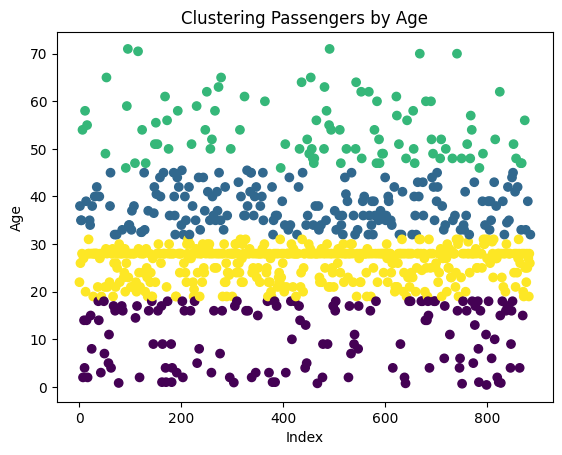

In [232]:
#clustering with Age
from sklearn.cluster import KMeans

age_data = df_cleaned[['Age']]
cluster_age = KMeans(n_clusters=4, random_state=42)
pred_cluster_age = cluster_age.fit_predict(age_data)

plt.scatter(age_data.index, age_data['Age'], c=pred_cluster_age, cmap='viridis')
plt.xlabel("Index")
plt.ylabel("Age")
plt.title("Clustering Passengers by Age")
plt

In [233]:
# df_cleaned["Age"]
df_model = df_cleaned.copy()
df_model["AgeCluster"] = pred_cluster_age
df_model.drop(columns=["Age"], inplace=True)

# 2. تعریف X و y
X = df_model.drop(columns=['Survived'])
y = df_model['Survived']

# 3. تقسیم داده‌ها
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [234]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

logreg = LogisticRegression(max_iter=1000, random_state=42)


logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)


print("Accuracy (AGE):", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy (AGE): 0.8202247191011236

Confusion Matrix:
 [[98 12]
 [20 48]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       110
           1       0.80      0.71      0.75        68

    accuracy                           0.82       178
   macro avg       0.82      0.80      0.80       178
weighted avg       0.82      0.82      0.82       178

